# <center>Data Analytics laboratory </center>

## <center>Intro to stan</center>

In [41]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

F = len("Radoslaw")
L = len("Szpot")

Excercise 1 - Generated Quantities Block

In [42]:
%%writefile code_1.stan
data {
  int M;
}

generated quantities {
  real lambda=fabs(normal_rng(0,121));
  int y_sim[M];
  for (k in 1:M) {
    y_sim[k] = poisson_rng(lambda);
  }
}

Overwriting code_1.stan


In [43]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /code_1.stan to exe file /code_1
INFO:cmdstanpy:compiled model executable: /code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/code_1.hpp /code_1.stan
Warning in '/code_1.stan', line 7, column 2: Declaration of arrays by placing
    brackets after a variable name is deprecated and will be removed in Stan
    2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ 

In [44]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [45]:
samples.column_names

('lp__',
 'accept_stat__',
 'lambda',
 'y_sim[1]',
 'y_sim[2]',
 'y_sim[3]',
 'y_sim[4]',
 'y_sim[5]',
 'y_sim[6]',
 'y_sim[7]',
 'y_sim[8]',
 'y_sim[9]',
 'y_sim[10]')

In [46]:
df = pd.DataFrame(samples.draws()[:,:, 2:].reshape((1000, 11)))
df.columns = samples.column_names[2:]
df.head()

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7],y_sim[8],y_sim[9],y_sim[10]
0,237.36700,228.0,256.0,234.0,239.0,238.0,252.0,244.0,244.0,235.0,226.0
1,16.77190,18.0,14.0,26.0,21.0,13.0,24.0,17.0,25.0,10.0,17.0
2,118.60400,119.0,145.0,141.0,109.0,125.0,113.0,131.0,116.0,133.0,124.0
3,278.86600,287.0,283.0,246.0,268.0,263.0,268.0,290.0,306.0,281.0,273.0
4,4.42415,6.0,4.0,3.0,8.0,7.0,4.0,4.0,3.0,4.0,5.0


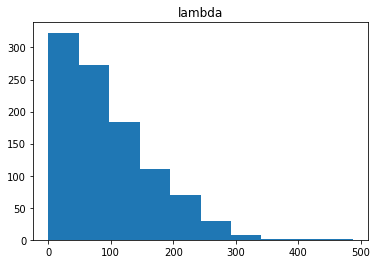

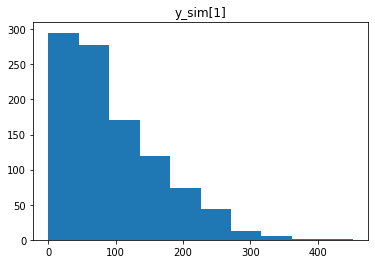

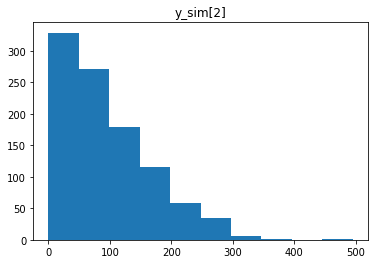

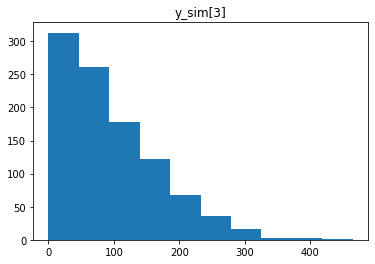

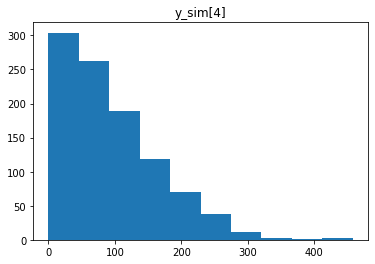

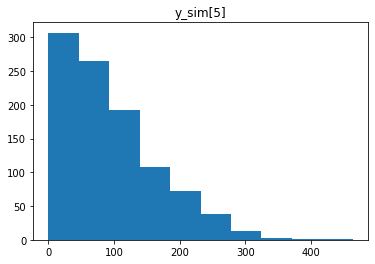

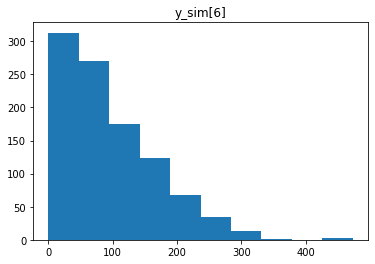

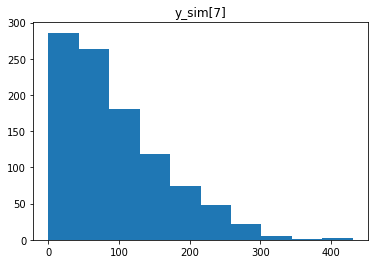

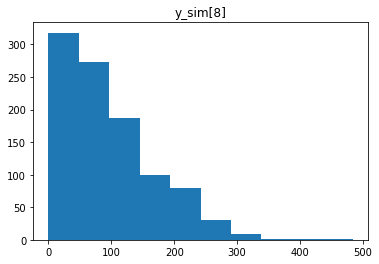

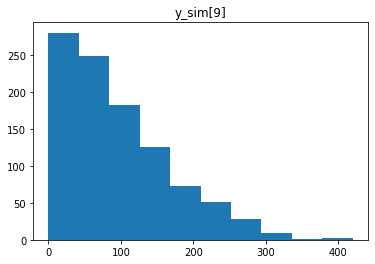

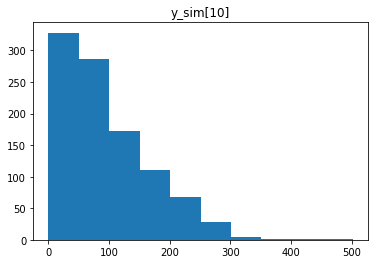

In [47]:
for i in range(11):
    plt.hist(df.iloc[:, i])
    plt.title(df.columns[i])
    plt.show()

Excercise 2 - Constraints on the data

In [48]:
%%writefile code_2.stan
data {
  int N;
  int y[N];
}

parameters {
  real<lower=0,upper=1> theta;
}

model {
  theta ~ beta(1,1);
  y ~ bernoulli(theta);
}

Overwriting code_2.stan


In [49]:
%%writefile code_3.stan
data {
    int<lower=1> N;
    int<lower=0,upper=1> y[N];
}

parameters {
  real<lower=0,upper=1> theta;
}

model {
    theta ~ beta(1, 1);
    y ~ bernoulli(theta);
}

Overwriting code_3.stan


In [50]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /code_2.stan to exe file /code_2
INFO:cmdstanpy:compiled model executable: /code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/code_2.hpp /code_2.stan
Warning in '/code_2.stan', line 3, column 2: Declaration of arrays by placing
    brackets after a variable name is deprecated and will be removed in Stan
    2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ 


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/code_2.stan', line 12, column 2 to column 23)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/code_2', 'id=1', 'random', 'seed=54148', 'data', 'file=/tmp/tmpudv9sq0e/b8gthzw6.json', 'output', 'file=/tmp/tmpudv9sq0e/code_2-20230322182017_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpudv9sq0e/code_2-20230322182017_1.csv
 console_msgs (if any):
	/tmp/tmpudv9sq0e/code_2-20230322182017_0-stdout.txt

In [51]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /code_3.stan to exe file /code_3
INFO:cmdstanpy:compiled model executable: /code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/code_3.hpp /code_3.stan
Warning in '/code_3.stan', line 3, column 4: Declaration of arrays by placing
    brackets after a variable name is deprecated and will be removed in Stan
    2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ 


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/code_3.stan', line 3, column 4 to column 30)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/code_3', 'id=1', 'random', 'seed=80432', 'data', 'file=/tmp/tmpudv9sq0e/yisicdxa.json', 'output', 'file=/tmp/tmpudv9sq0e/code_3-20230322182103_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpudv9sq0e/code_3-20230322182103_1.csv
 console_msgs (if any):
	/tmp/tmpudv9sq0e/code_3-20230322182103_0-stdout.txt

Passed variable y breaks model since 2 is not permitted vaue for Bernoli distribution which must be between [0, 1].

Excercise 3 - Constraints on parameters  

Unconstrained parameters

In [52]:
%%writefile code_4.stan
parameters {
  real theta;
}
model {
  theta ~ gamma(1.25, 1.25);
}

Overwriting code_4.stan


In [53]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /code_4.stan to exe file /code_4
INFO:cmdstanpy:compiled model executable: /code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230322182114_1.csv, /samples/code_4-20230322182114_2.csv, /samples/code_4-20230322182114_3.csv, /samples/code_4-20230322182114_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

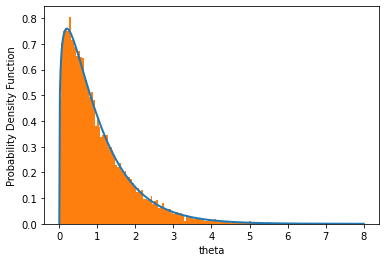

In [54]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma1.draws().reshape(6000*4,8)[:,-1], density=True, bins=160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Constrained parameter

In [55]:
%%writefile code_5.stan
parameters {
  real<lower=0> theta;
}
model {
  theta ~ gamma(1.25, 1.25);
}

Writing code_5.stan


In [56]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /code_5.stan to exe file /code_5
INFO:cmdstanpy:compiled model executable: /code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▏         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230322182128_1.csv, /samples/code_5-20230322182128_2.csv, /samples/code_5-20230322182128_3.csv, /samples/code_5-20230322182128_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

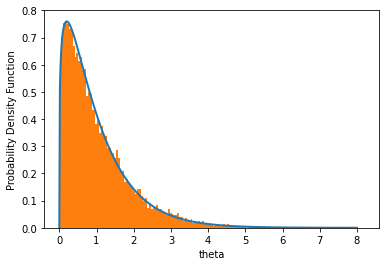

In [58]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma2.draws().reshape(6000*4,8)[:,-1], density=True, bins=160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Excercise 4 - Selection of parameters using equation solving

In [69]:
%%writefile code_6.stan
functions {
    vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i) {
        vector[1] deltas;
        deltas[1] = 2 * (normal_cdf(theta[1], 0, exp(y[1])) - 0.5) - 0.99;
        return deltas;
    }
}
data {
    vector[1] y_guess;
    vector[1] theta;
}

transformed data {
    vector[1] y;
    real x_r[0];
    int x_i[0];
    
    y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i);
    
    print("Standard deviation = ", exp(y[1]));
}

generated quantities {
    real sigma = exp(y[1]);
}

Overwriting code_6.stan


In [81]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 2

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains=1)
print(f"Standard deviation of half_normal distribution should be less than: {F+L/2}\n"
f"Calculated standard deviation of half_normal distribution is: {tunes.draws()[0, 0, 2]}")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Standard deviation of half_normal distribution should be less than: 10.5
Calculated standard deviation of half_normal distribution is: 2.52346


Excercise 5 - different methods of defining models

In [91]:
%%writefile code_7.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}

Overwriting code_7.stan


In [92]:
%%writefile code_8.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    target += normal_lpdf(y | theta, 1);
    target += normal_lpdf(theta | 0, 1);
}

Overwriting code_8.stan


In [93]:
%%writefile code_9.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    for (n in 1:N) 
        target += normal_lpdf(y[n] | theta, 1);   
    
    target += normal_lpdf(theta | 0, 1);
}

Overwriting code_9.stan


In [95]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 15012000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


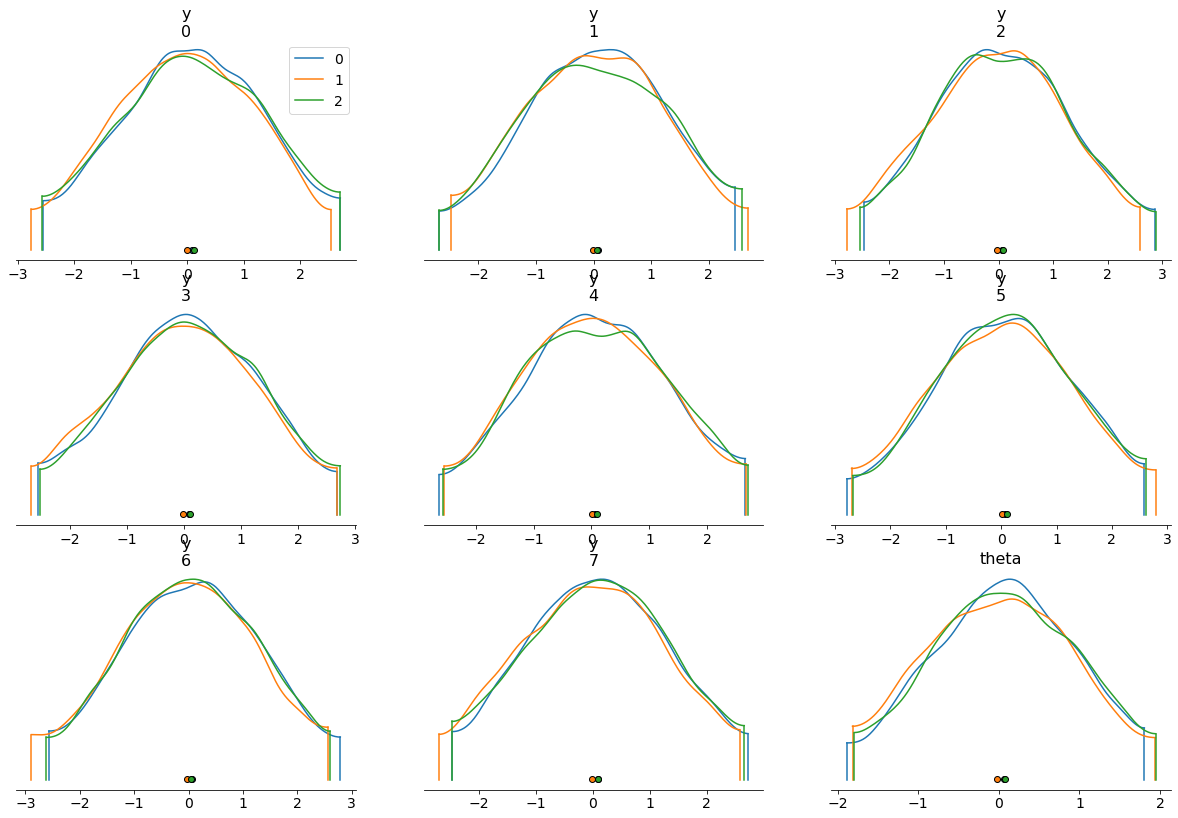

In [96]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Excercise 6 - generated quantities post sampling

In [97]:
%%writefile code_10.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}

generated quantities {
    real mean_y = mean(y);
}

Writing code_10.stan


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


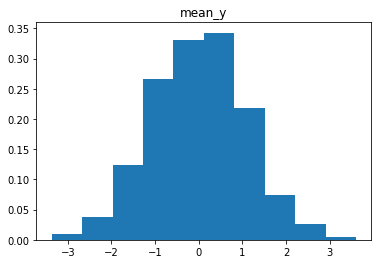

In [99]:
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
                                        
plt.hist(mean_of_y.draws_pd()['mean_y'], density=True)
plt.title('mean_y')
plt.show()